In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\histopathological_img_dataset'  
output_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data'

# Create base directories for train, val, and test
os.makedirs(output_dir, exist_ok=True)
os.makedirs(f'{output_dir}/train', exist_ok=True)
os.makedirs(f'{output_dir}/val', exist_ok=True)
os.makedirs(f'{output_dir}/test', exist_ok=True)

# Process each folder, treating each subfolder as its own class
for main_class_name in os.listdir(data_dir):
    main_class_path = os.path.join(data_dir, main_class_name)
    
    if os.path.isdir(main_class_path):
        # Check for subdirectories within the main class folder
        subdirs = [d for d in os.listdir(main_class_path) if os.path.isdir(os.path.join(main_class_path, d))]
        
        if subdirs:
            # If subfolders exist, treat each subfolder as a distinct class
            for subdir in subdirs:
                subdir_path = os.path.join(main_class_path, subdir)
                class_name = f"{main_class_name}_{subdir}"  # Unique class name, e.g., "NE_Follicular"
                images = os.listdir(subdir_path)

                # Skip if there are not enough images to split
                if len(images) < 4:
                    print(f"Skipping class '{class_name}' as it has fewer than 4 images.")
                    continue

                # Split into train (70%), val (15%), and test (15%)
                train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
                if len(temp_images) >= 2:
                    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)
                else:
                    val_images, test_images = temp_images, []

                # Create class directories within train, val, and test folders
                for split in ['train', 'val', 'test']:
                    os.makedirs(f'{output_dir}/{split}/{class_name}', exist_ok=True)

                # Copy images to the respective split folders
                for image in train_images:
                    shutil.copy(os.path.join(subdir_path, image), f'{output_dir}/train/{class_name}/{image}')
                
                for image in val_images:
                    shutil.copy(os.path.join(subdir_path, image), f'{output_dir}/val/{class_name}/{image}')
                
                for image in test_images:
                    shutil.copy(os.path.join(subdir_path, image), f'{output_dir}/test/{class_name}/{image}')
        else:
            # No subfolders; treat main folder as a single class
            class_name = main_class_name
            images = os.listdir(main_class_path)

            # Split into train (70%), val (15%), and test (15%)
            train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
            if len(temp_images) >= 2:
                val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)
            else:
                val_images, test_images = temp_images, []

            # Create class directories within train, val, and test folders
            for split in ['train', 'val', 'test']:
                os.makedirs(f'{output_dir}/{split}/{class_name}', exist_ok=True)

            # Copy images to the respective split folders
            for image in train_images:
                shutil.copy(os.path.join(main_class_path, image), f'{output_dir}/train/{class_name}/{image}')
            
            for image in val_images:
                shutil.copy(os.path.join(main_class_path, image), f'{output_dir}/val/{class_name}/{image}')
            
            for image in test_images:
                shutil.copy(os.path.join(main_class_path, image), f'{output_dir}/test/{class_name}/{image}')

print("Dataset split completed and organized into train, val, and test folders.")


Dataset split completed and organized into train, val, and test folders.


In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Dataset example
dataset = datasets.ImageFolder(
    root=r"D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data",
    transform=transforms.ToTensor()
)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Get a sample image
data_iter = iter(dataloader)
image, label = next(data_iter)

# Print image shape
print(f"Image shape: {image.shape}")  # (Batch, Channels, Height, Width)


Image shape: torch.Size([1, 3, 480, 640])


In [10]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix

# Define paths
train_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data\train'
val_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data\val'
test_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data\test'

# Define transforms (adjust these as needed)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to fit ResNet50 input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard ImageNet normalization
])

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
val_dataset = ImageFolder(root=val_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check the number of classes
num_classes = len(train_dataset.classes)
print(f"Number of classes: {num_classes}")
print("Class names:", train_dataset.classes)


Number of classes: 6
Class names: ['EA', 'EH_Complex', 'EH_Simple', 'EP', 'NE_Follicular', 'NE_Luteal']


# DENSENET

In [11]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix

# Define paths
train_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data\test'
val_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data\val'
test_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data\test'

# Define transforms (adjust these as needed)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to fit DenseNet input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard ImageNet normalization
])

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
val_dataset = ImageFolder(root=val_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check the number of classes
num_classes = len(train_dataset.classes)
print(f"Number of classes: {num_classes}")
print("Class names:", train_dataset.classes)


Number of classes: 6
Class names: ['EA', 'EH_Complex', 'EH_Simple', 'EP', 'NE_Follicular', 'NE_Luteal']


In [12]:
import torch.nn as nn
import torchvision.models as models

# Load DenseNet121 and modify the classifier layer to match the number of classes
model = models.densenet121(pretrained=True)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, num_classes)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print( torch.cuda.is_available())

c:\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


True


In [13]:
import torch.optim as optim
import torch.nn as nn
import torch

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Paths to save the model
model_save_path = "densenet.pth"

# Initialize variables for best model saving
best_val_accuracy = 0.0

# Training loop
epochs = 100  # Adjust based on dataset size and performance
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Validation step
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss/len(train_loader):.4f}, "
          f"Val Loss: {val_loss/len(val_loader):.4f}, "
          f"Val Accuracy: {val_accuracy:.2f}%")
    
    # Save the model if it achieves the best validation accuracy so far
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at epoch {epoch+1} with Validation Accuracy: {val_accuracy:.2f}%")

print("Training complete")


Epoch [1/100], Train Loss: 1.3867, Val Loss: 5.7194, Val Accuracy: 32.32%
Model saved at epoch 1 with Validation Accuracy: 32.32%
Epoch [2/100], Train Loss: 0.8994, Val Loss: 2.9321, Val Accuracy: 41.06%
Model saved at epoch 2 with Validation Accuracy: 41.06%
Epoch [3/100], Train Loss: 0.7109, Val Loss: 1.9759, Val Accuracy: 48.78%
Model saved at epoch 3 with Validation Accuracy: 48.78%
Epoch [4/100], Train Loss: 0.5749, Val Loss: 1.5012, Val Accuracy: 57.11%
Model saved at epoch 4 with Validation Accuracy: 57.11%
Epoch [5/100], Train Loss: 0.5479, Val Loss: 1.5892, Val Accuracy: 53.25%
Epoch [6/100], Train Loss: 0.4216, Val Loss: 2.1845, Val Accuracy: 51.42%
Epoch [7/100], Train Loss: 0.3732, Val Loss: 1.9263, Val Accuracy: 52.44%
Epoch [8/100], Train Loss: 0.2775, Val Loss: 1.2530, Val Accuracy: 60.57%
Model saved at epoch 8 with Validation Accuracy: 60.57%
Epoch [9/100], Train Loss: 0.1927, Val Loss: 1.4569, Val Accuracy: 60.57%
Epoch [10/100], Train Loss: 0.2286, Val Loss: 1.5349, 

C:\Users\user\AppData\Local\Temp\ipykernel_2876\754930847.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("densenet.pth"))


Test Loss: 0.0006
Test Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           EA       1.00      1.00      1.00        80
   EH_Complex       1.00      1.00      1.00        43
    EH_Simple       1.00      1.00      1.00        78
           EP       1.00      1.00      1.00        96
NE_Follicular       1.00      1.00      1.00       107
    NE_Luteal       1.00      1.00      1.00        91

     accuracy                           1.00       495
    macro avg       1.00      1.00      1.00       495
 weighted avg       1.00      1.00      1.00       495



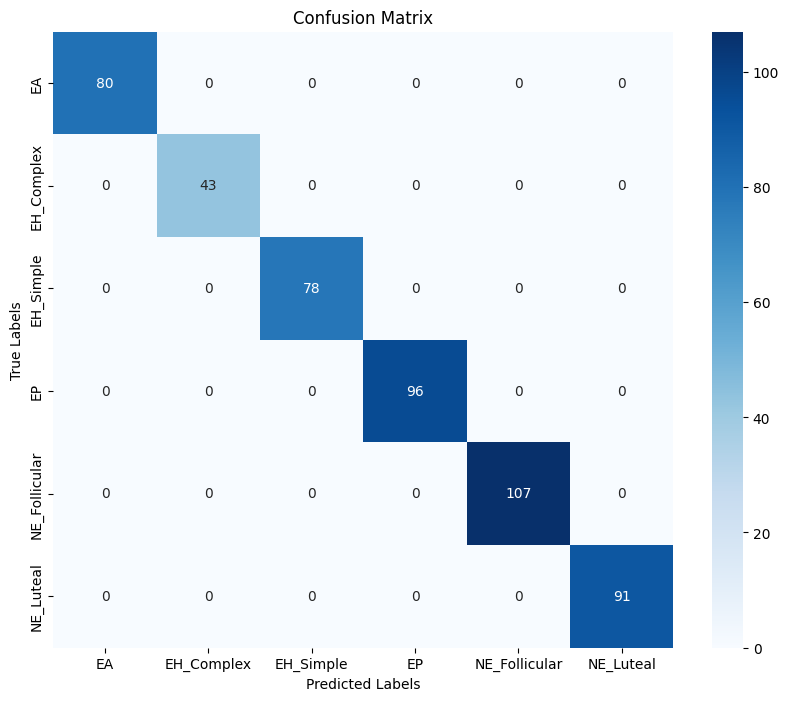

In [15]:
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the model architecture and state dictionary
model.load_state_dict(torch.load("densenet.pth"))
model.to(device)
model.eval()

# Initialize variables for evaluation
all_labels = []
all_predictions = []

criterion = nn.CrossEntropyLoss()  # Define the same loss function used during training

test_loss = 0.0

# Evaluation loop
with torch.no_grad():
    for inputs, labels in test_loader:  # Replace `test_loader` with your DataLoader for test data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Calculate metrics
test_accuracy = accuracy_score(all_labels, all_predictions)
conf_matrix = confusion_matrix(all_labels, all_predictions)
class_report = classification_report(all_labels, all_predictions, target_names=['EA', 'EH_Complex', 'EH_Simple', 'EP', 'NE_Follicular', 'NE_Luteal'])  # Replace `class_names` with your class labels

# Print metrics
print(f"Test Loss: {test_loss/len(test_loader):.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['EA', 'EH_Complex', 'EH_Simple', 'EP', 'NE_Follicular', 'NE_Luteal'], yticklabels=['EA', 'EH_Complex', 'EH_Simple', 'EP', 'NE_Follicular', 'NE_Luteal'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# SWIN

In [16]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define paths
train_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data\train'
val_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data\val'
test_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data\test'

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard normalization
])

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
val_dataset = ImageFolder(root=val_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check the number of classes
num_classes = len(train_dataset.classes)
print(f"Number of classes: {num_classes}")
print("Class names:", train_dataset.classes)


Number of classes: 6
Class names: ['EA', 'EH_Complex', 'EH_Simple', 'EP', 'NE_Follicular', 'NE_Luteal']


In [17]:
from transformers import SwinForImageClassification

# Load the pretrained Swin Transformer model and modify for our number of classes
model = SwinForImageClassification.from_pretrained(
    "microsoft/swin-tiny-patch4-window7-224", 
    num_labels=num_classes,
    ignore_mismatched_sizes=True  # Ignore size mismatch for the classifier layer
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([6]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
import torch.nn as nn
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# Training loop
epochs = 100  # Adjust based on dataset size and performance
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(pixel_values=inputs).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Validation step
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(pixel_values=inputs).logits
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss/len(train_loader):.4f}, "
          f"Val Loss: {val_loss/len(val_loader):.4f}, "
          f"Val Accuracy: {100 * correct / total:.2f}%")

print("Training complete")


Epoch [1/100], Train Loss: 1.2520, Val Loss: 0.8057, Val Accuracy: 68.70%
Epoch [2/100], Train Loss: 0.7511, Val Loss: 0.6949, Val Accuracy: 72.15%
Epoch [3/100], Train Loss: 0.5951, Val Loss: 0.6414, Val Accuracy: 73.58%
Epoch [4/100], Train Loss: 0.4730, Val Loss: 0.5897, Val Accuracy: 74.80%
Epoch [5/100], Train Loss: 0.3774, Val Loss: 0.6186, Val Accuracy: 74.19%
Epoch [6/100], Train Loss: 0.3258, Val Loss: 0.5591, Val Accuracy: 78.86%
Epoch [7/100], Train Loss: 0.2399, Val Loss: 0.5397, Val Accuracy: 79.88%
Epoch [8/100], Train Loss: 0.1801, Val Loss: 0.5049, Val Accuracy: 80.28%
Epoch [9/100], Train Loss: 0.1481, Val Loss: 0.5382, Val Accuracy: 81.91%
Epoch [10/100], Train Loss: 0.1406, Val Loss: 0.5583, Val Accuracy: 79.88%
Epoch [11/100], Train Loss: 0.1040, Val Loss: 0.6302, Val Accuracy: 79.47%
Epoch [12/100], Train Loss: 0.0874, Val Loss: 0.6016, Val Accuracy: 79.27%
Epoch [13/100], Train Loss: 0.0792, Val Loss: 0.6909, Val Accuracy: 80.28%
Epoch [14/100], Train Loss: 0.0638

In [19]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

# Evaluation on the test set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(pixel_values=inputs).logits
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays for metric calculation
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
classification_rep = classification_report(all_labels, all_preds, target_names=train_dataset.classes)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Test Accuracy: 81.21%
Precision: 0.81
Recall: 0.81
F1 Score: 0.81

Classification Report:
                precision    recall  f1-score   support

           EA       0.95      0.94      0.94        80
   EH_Complex       0.85      0.79      0.82        43
    EH_Simple       0.86      0.78      0.82        78
           EP       0.67      0.68      0.67        96
NE_Follicular       0.75      0.78      0.76       107
    NE_Luteal       0.86      0.92      0.89        91

     accuracy                           0.81       495
    macro avg       0.82      0.81      0.82       495
 weighted avg       0.81      0.81      0.81       495


Confusion Matrix:
 [[75  3  0  0  0  2]
 [ 3 34  2  1  0  3]
 [ 0  3 61  5  4  5]
 [ 0  0  6 65 22  3]
 [ 0  0  2 21 83  1]
 [ 1  0  0  5  1 84]]


# RESNET50 TRY-2

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import os

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Create datasets
def load_datasets(data_dir):
    image_datasets = {x: ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                     for x in ['train', 'val', 'test']}
    
    dataloaders = {x: DataLoader(image_datasets[x], batch_size=32,
                                shuffle=True if x == 'train' else False,
                                num_workers=4)
                  for x in ['train', 'val', 'test']}
    
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
    class_names = image_datasets['train'].classes
    
    return dataloaders, dataset_sizes, class_names

# Modified ResNet50 for 7 classes
def create_model():
    model = models.resnet50(pretrained=True)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 7)  # 7 classes
    return model

# Training function
def train_model(model, dataloaders, criterion, optimizer, num_epochs=10):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
        
        print()
    
    print(f'Best val Acc: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Main execution
if __name__ == '__main__':
    # Set your data directory
    data_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data'
    
    # Load datasets
    dataloaders, dataset_sizes, class_names = load_datasets(data_dir)
    print(f"Classes: {class_names}")
    
    # Create and move model to device
    model = create_model()
    model = model.to(device)
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    
    # Train the model
    model = train_model(model, dataloaders, criterion, optimizer, num_epochs=100)
    
    # Evaluate on test set
    evaluate_model(model, dataloaders['test'])
    
    # Save the model
    torch.save(model.state_dict(), 'resnet50_custom_model.pth')

Classes: ['EA', 'EH_Complex', 'EH_Simple', 'EP', 'NE_Follicular', 'NE_Luteal']


c:\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/99
----------


100%|██████████| 72/72 [00:31<00:00,  2.26it/s]


train Loss: 1.4475 Acc: 0.4298


100%|██████████| 16/16 [00:04<00:00,  3.34it/s]


val Loss: 0.9936 Acc: 0.5976

Epoch 1/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 1.0259 Acc: 0.6068


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.7769 Acc: 0.6951

Epoch 2/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.67it/s]


train Loss: 0.8743 Acc: 0.6452


100%|██████████| 16/16 [00:04<00:00,  3.46it/s]


val Loss: 0.7073 Acc: 0.7154

Epoch 3/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.67it/s]


train Loss: 0.7781 Acc: 0.6949


100%|██████████| 16/16 [00:04<00:00,  3.50it/s]


val Loss: 0.7227 Acc: 0.6890

Epoch 4/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.7759 Acc: 0.6949


100%|██████████| 16/16 [00:04<00:00,  3.49it/s]


val Loss: 0.6431 Acc: 0.7358

Epoch 5/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.6975 Acc: 0.7306


100%|██████████| 16/16 [00:04<00:00,  3.49it/s]


val Loss: 0.5896 Acc: 0.7785

Epoch 6/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.67it/s]


train Loss: 0.6639 Acc: 0.7432


100%|██████████| 16/16 [00:04<00:00,  3.46it/s]


val Loss: 0.5621 Acc: 0.7825

Epoch 7/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.67it/s]


train Loss: 0.6103 Acc: 0.7624


100%|██████████| 16/16 [00:04<00:00,  3.51it/s]


val Loss: 0.5664 Acc: 0.7805

Epoch 8/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.6057 Acc: 0.7594


100%|██████████| 16/16 [00:04<00:00,  3.45it/s]


val Loss: 0.5552 Acc: 0.8028

Epoch 9/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.5519 Acc: 0.7886


100%|██████████| 16/16 [00:04<00:00,  3.50it/s]


val Loss: 0.5623 Acc: 0.7866

Epoch 10/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.5032 Acc: 0.8134


100%|██████████| 16/16 [00:04<00:00,  3.44it/s]


val Loss: 0.5598 Acc: 0.7825

Epoch 11/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.67it/s]


train Loss: 0.4827 Acc: 0.8152


100%|██████████| 16/16 [00:04<00:00,  3.52it/s]


val Loss: 0.5500 Acc: 0.7866

Epoch 12/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.4642 Acc: 0.8152


100%|██████████| 16/16 [00:04<00:00,  3.44it/s]


val Loss: 0.5408 Acc: 0.7866

Epoch 13/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.67it/s]


train Loss: 0.4338 Acc: 0.8309


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.5312 Acc: 0.7967

Epoch 14/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.4430 Acc: 0.8326


100%|██████████| 16/16 [00:04<00:00,  3.45it/s]


val Loss: 0.5682 Acc: 0.8008

Epoch 15/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.4064 Acc: 0.8479


100%|██████████| 16/16 [00:04<00:00,  3.46it/s]


val Loss: 0.6254 Acc: 0.7683

Epoch 16/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.67it/s]


train Loss: 0.4106 Acc: 0.8396


100%|██████████| 16/16 [00:04<00:00,  3.46it/s]


val Loss: 0.5555 Acc: 0.7967

Epoch 17/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.3791 Acc: 0.8544


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.5997 Acc: 0.7886

Epoch 18/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.3489 Acc: 0.8614


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.5269 Acc: 0.8008

Epoch 19/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.3888 Acc: 0.8509


100%|██████████| 16/16 [00:04<00:00,  3.39it/s]


val Loss: 0.5726 Acc: 0.8089

Epoch 20/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.3357 Acc: 0.8819


100%|██████████| 16/16 [00:04<00:00,  3.45it/s]


val Loss: 0.6351 Acc: 0.7744

Epoch 21/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.3335 Acc: 0.8827


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.6325 Acc: 0.8008

Epoch 22/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.3341 Acc: 0.8701


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.6358 Acc: 0.8028

Epoch 23/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.3137 Acc: 0.8888


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.6159 Acc: 0.8171

Epoch 24/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.2981 Acc: 0.8923


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.6198 Acc: 0.8089

Epoch 25/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.2821 Acc: 0.8928


100%|██████████| 16/16 [00:04<00:00,  3.39it/s]


val Loss: 0.6703 Acc: 0.7947

Epoch 26/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.3062 Acc: 0.8806


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.6994 Acc: 0.7785

Epoch 27/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.2847 Acc: 0.8928


100%|██████████| 16/16 [00:04<00:00,  3.38it/s]


val Loss: 0.6643 Acc: 0.7988

Epoch 28/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.2851 Acc: 0.8967


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.6399 Acc: 0.8028

Epoch 29/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.2762 Acc: 0.9050


100%|██████████| 16/16 [00:04<00:00,  3.49it/s]


val Loss: 0.6510 Acc: 0.8069

Epoch 30/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.2511 Acc: 0.9085


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.5760 Acc: 0.8333

Epoch 31/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.2344 Acc: 0.9189


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.6306 Acc: 0.7947

Epoch 32/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.2542 Acc: 0.9093


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.7059 Acc: 0.7825

Epoch 33/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.2485 Acc: 0.9146


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.6088 Acc: 0.8130

Epoch 34/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.2296 Acc: 0.9128


100%|██████████| 16/16 [00:04<00:00,  3.39it/s]


val Loss: 0.6414 Acc: 0.7846

Epoch 35/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.2489 Acc: 0.9141


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.6599 Acc: 0.8049

Epoch 36/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.2339 Acc: 0.9150


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.7018 Acc: 0.7947

Epoch 37/99
----------


100%|██████████| 72/72 [00:27<00:00,  2.66it/s]


train Loss: 0.2361 Acc: 0.9119


100%|██████████| 16/16 [00:04<00:00,  3.43it/s]


val Loss: 0.6376 Acc: 0.7927

Epoch 38/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.2097 Acc: 0.9246


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.7037 Acc: 0.7907

Epoch 39/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1970 Acc: 0.9263


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.6546 Acc: 0.8089

Epoch 40/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1905 Acc: 0.9307


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.6327 Acc: 0.7988

Epoch 41/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.2124 Acc: 0.9207


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.7632 Acc: 0.7947

Epoch 42/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.2004 Acc: 0.9233


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.7981 Acc: 0.7825

Epoch 43/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.2086 Acc: 0.9237


100%|██████████| 16/16 [00:04<00:00,  3.39it/s]


val Loss: 0.7331 Acc: 0.7927

Epoch 44/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.2053 Acc: 0.9241


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.6877 Acc: 0.7988

Epoch 45/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.2053 Acc: 0.9281


100%|██████████| 16/16 [00:04<00:00,  3.43it/s]


val Loss: 0.7454 Acc: 0.7805

Epoch 46/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.70it/s]


train Loss: 0.2448 Acc: 0.9093


100%|██████████| 16/16 [00:04<00:00,  3.44it/s]


val Loss: 0.7205 Acc: 0.7866

Epoch 47/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1795 Acc: 0.9368


100%|██████████| 16/16 [00:04<00:00,  3.44it/s]


val Loss: 0.7222 Acc: 0.7866

Epoch 48/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1788 Acc: 0.9316


100%|██████████| 16/16 [00:04<00:00,  3.27it/s]


val Loss: 0.7374 Acc: 0.7866

Epoch 49/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1815 Acc: 0.9381


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.6777 Acc: 0.8049

Epoch 50/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1695 Acc: 0.9385


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.7401 Acc: 0.7967

Epoch 51/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1762 Acc: 0.9377


100%|██████████| 16/16 [00:04<00:00,  3.41it/s]


val Loss: 0.6965 Acc: 0.8089

Epoch 52/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1856 Acc: 0.9324


100%|██████████| 16/16 [00:04<00:00,  3.46it/s]


val Loss: 0.7165 Acc: 0.7907

Epoch 53/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1420 Acc: 0.9481


100%|██████████| 16/16 [00:04<00:00,  3.41it/s]


val Loss: 0.7597 Acc: 0.7866

Epoch 54/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.70it/s]


train Loss: 0.1760 Acc: 0.9320


100%|██████████| 16/16 [00:04<00:00,  3.45it/s]


val Loss: 0.6794 Acc: 0.8130

Epoch 55/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1675 Acc: 0.9372


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.7765 Acc: 0.7724

Epoch 56/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1675 Acc: 0.9394


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.8162 Acc: 0.7785

Epoch 57/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1813 Acc: 0.9285


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.6355 Acc: 0.8171

Epoch 58/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1358 Acc: 0.9547


100%|██████████| 16/16 [00:04<00:00,  3.42it/s]


val Loss: 0.7729 Acc: 0.8008

Epoch 59/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1629 Acc: 0.9368


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.7636 Acc: 0.8028

Epoch 60/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1316 Acc: 0.9547


100%|██████████| 16/16 [00:04<00:00,  3.41it/s]


val Loss: 0.6797 Acc: 0.8089

Epoch 61/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1372 Acc: 0.9516


100%|██████████| 16/16 [00:04<00:00,  3.46it/s]


val Loss: 0.6551 Acc: 0.8272

Epoch 62/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1449 Acc: 0.9477


100%|██████████| 16/16 [00:04<00:00,  3.42it/s]


val Loss: 0.7500 Acc: 0.8130

Epoch 63/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1585 Acc: 0.9433


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.7025 Acc: 0.8028

Epoch 64/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1398 Acc: 0.9455


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.6756 Acc: 0.8150

Epoch 65/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1344 Acc: 0.9507


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.6711 Acc: 0.8191

Epoch 66/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1474 Acc: 0.9420


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.7115 Acc: 0.8232

Epoch 67/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1515 Acc: 0.9398


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.7110 Acc: 0.7947

Epoch 68/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1364 Acc: 0.9516


100%|██████████| 16/16 [00:04<00:00,  3.41it/s]


val Loss: 0.6988 Acc: 0.7947

Epoch 69/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1135 Acc: 0.9595


100%|██████████| 16/16 [00:04<00:00,  3.45it/s]


val Loss: 0.6829 Acc: 0.8008

Epoch 70/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.67it/s]


train Loss: 0.1450 Acc: 0.9446


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.7310 Acc: 0.7846

Epoch 71/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1242 Acc: 0.9582


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.7801 Acc: 0.7886

Epoch 72/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1284 Acc: 0.9516


100%|██████████| 16/16 [00:04<00:00,  3.39it/s]


val Loss: 0.7322 Acc: 0.8252

Epoch 73/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1201 Acc: 0.9577


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.7250 Acc: 0.8049

Epoch 74/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1346 Acc: 0.9534


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.6425 Acc: 0.8232

Epoch 75/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1412 Acc: 0.9446


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.7032 Acc: 0.8110

Epoch 76/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1268 Acc: 0.9595


100%|██████████| 16/16 [00:04<00:00,  3.41it/s]


val Loss: 0.7854 Acc: 0.7846

Epoch 77/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1188 Acc: 0.9564


100%|██████████| 16/16 [00:04<00:00,  3.45it/s]


val Loss: 0.7277 Acc: 0.8110

Epoch 78/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1215 Acc: 0.9568


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.7203 Acc: 0.8171

Epoch 79/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1225 Acc: 0.9577


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.7940 Acc: 0.7825

Epoch 80/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1149 Acc: 0.9529


100%|██████████| 16/16 [00:04<00:00,  3.38it/s]


val Loss: 0.7511 Acc: 0.8110

Epoch 81/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1325 Acc: 0.9547


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.7792 Acc: 0.7744

Epoch 82/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.67it/s]


train Loss: 0.1535 Acc: 0.9459


100%|██████████| 16/16 [00:04<00:00,  3.46it/s]


val Loss: 0.7260 Acc: 0.7825

Epoch 83/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1380 Acc: 0.9494


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.6776 Acc: 0.8130

Epoch 84/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1079 Acc: 0.9621


100%|██████████| 16/16 [00:04<00:00,  3.41it/s]


val Loss: 0.7143 Acc: 0.8089

Epoch 85/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.70it/s]


train Loss: 0.1150 Acc: 0.9595


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.7649 Acc: 0.8171

Epoch 86/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1179 Acc: 0.9612


100%|██████████| 16/16 [00:04<00:00,  3.45it/s]


val Loss: 0.7984 Acc: 0.7927

Epoch 87/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1157 Acc: 0.9599


100%|██████████| 16/16 [00:04<00:00,  3.42it/s]


val Loss: 0.7675 Acc: 0.8293

Epoch 88/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1195 Acc: 0.9608


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.7572 Acc: 0.8110

Epoch 89/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1095 Acc: 0.9590


100%|██████████| 16/16 [00:04<00:00,  3.43it/s]


val Loss: 0.8706 Acc: 0.7907

Epoch 90/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1181 Acc: 0.9560


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.7129 Acc: 0.8089

Epoch 91/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1059 Acc: 0.9599


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.7764 Acc: 0.8049

Epoch 92/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1029 Acc: 0.9629


100%|██████████| 16/16 [00:04<00:00,  3.44it/s]


val Loss: 0.7244 Acc: 0.8089

Epoch 93/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.67it/s]


train Loss: 0.1187 Acc: 0.9582


100%|██████████| 16/16 [00:04<00:00,  3.47it/s]


val Loss: 0.7530 Acc: 0.8272

Epoch 94/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1113 Acc: 0.9599


100%|██████████| 16/16 [00:04<00:00,  3.46it/s]


val Loss: 0.9426 Acc: 0.7866

Epoch 95/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1170 Acc: 0.9590


100%|██████████| 16/16 [00:04<00:00,  3.41it/s]


val Loss: 0.8354 Acc: 0.7988

Epoch 96/99
----------


100%|██████████| 72/72 [00:27<00:00,  2.66it/s]


train Loss: 0.1033 Acc: 0.9634


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.8042 Acc: 0.7907

Epoch 97/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.67it/s]


train Loss: 0.1195 Acc: 0.9560


100%|██████████| 16/16 [00:04<00:00,  3.46it/s]


val Loss: 0.8050 Acc: 0.8150

Epoch 98/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


train Loss: 0.1109 Acc: 0.9586


100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


val Loss: 0.8464 Acc: 0.8069

Epoch 99/99
----------


100%|██████████| 72/72 [00:26<00:00,  2.68it/s]


train Loss: 0.1301 Acc: 0.9573


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


val Loss: 0.7879 Acc: 0.8069

Best val Acc: 0.8333


100%|██████████| 16/16 [00:04<00:00,  3.46it/s]

Test Accuracy: 81.01%


c:\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\user\AppData\Local\Temp\ipykernel_2876\438476542.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for

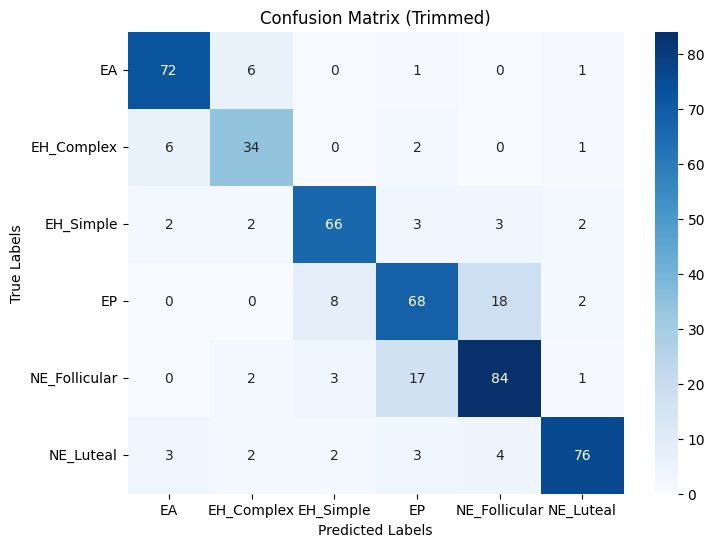

Classification Report:
EA: Precision: 0.95, Recall: 0.94, F1-Score: 0.94, Support: 80.0
EH_Complex: Precision: 0.85, Recall: 0.79, F1-Score: 0.82, Support: 43.0
EH_Simple: Precision: 0.86, Recall: 0.78, F1-Score: 0.82, Support: 78.0
EP: Precision: 0.67, Recall: 0.68, F1-Score: 0.67, Support: 96.0
NE_Follicular: Precision: 0.75, Recall: 0.78, F1-Score: 0.76, Support: 107.0
NE_Luteal: Precision: 0.86, Recall: 0.92, F1-Score: 0.89, Support: 91.0
accuracy: 0.81
macro avg: Precision: 0.82, Recall: 0.81, F1-Score: 0.82, Support: 495.0
weighted avg: Precision: 0.81, Recall: 0.81, F1-Score: 0.81, Support: 495.0
               precision    recall  f1-score     support
EA              0.949367  0.937500  0.943396   80.000000
EH_Complex      0.850000  0.790698  0.819277   43.000000
EH_Simple       0.859155  0.782051  0.818792   78.000000
EP              0.670103  0.677083  0.673575   96.000000
NE_Follicular   0.754545  0.775701  0.764977  107.000000
NE_Luteal       0.857143  0.923077  0.888889   

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import os
import pandas as pd

torch.cuda.empty_cache()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

def create_model():
    model = models.resnet50(pretrained=True)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 7)  # 7 classes
    return model



# Load the model
def load_model(model, model_path):
    model.load_state_dict(torch.load(model_path))
    model.eval()  # Set the model to evaluation mode
    return model

# Evaluate function with confusion matrix
def evaluate_model_and_confusion_matrix(model, dataloaders, class_names):
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Convert to numpy arrays
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    return conf_matrix


def load_datasets(data_dir):
    image_datasets = {x: ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                     for x in ['train', 'val', 'test']}
    
    dataloaders = {x: DataLoader(image_datasets[x], batch_size=32,
                                shuffle=True if x == 'train' else False,
                                num_workers=4)
                  for x in ['train', 'val', 'test']}
    
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
    class_names = image_datasets['train'].classes
    
    return dataloaders, dataset_sizes, class_names

# Function to plot confusion matrix
# Function to plot confusion matrix with the last row and column removed
def plot_confusion_matrix(conf_matrix, class_names):
    # Remove the last row and column
    trimmed_conf_matrix = conf_matrix[:-1, :-1]
    
    
    plt.figure(figsize=(8,6))
    sns.heatmap(trimmed_conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix (Trimmed)")
    plt.show()


def calculate_metrics(all_labels, all_preds, class_names):
    # Generate a classification report
    report = classification_report(all_labels, all_preds, target_names=class_names, digits=2, output_dict=True)

    # Print the classification report
    print("Classification Report:")
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"{label}: Precision: {metrics['precision']:.2f}, Recall: {metrics['recall']:.2f}, F1-Score: {metrics['f1-score']:.2f}, Support: {metrics['support']}")
        else:
            print(f"{label}: {metrics:.2f}")

    # Convert the report to a DataFrame for easier visualization
    metrics_df = pd.DataFrame(report).transpose()

    return metrics_df



# Main execution
if __name__ == '__main__':
    # Set your data directory and model path
    data_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data'
    model_path = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\resnet50_custom_model.pth'
    
    # Load datasets
    dataloaders, dataset_sizes, class_names = load_datasets(data_dir)
    
    # Create and move model to device
    model = create_model()
    model = model.to(device)
    
    # Load the saved model
    model = load_model(model, model_path)
    
    # Evaluate the model and get the confusion matrix
    conf_matrix = evaluate_model_and_confusion_matrix(model, dataloaders, class_names)
    
    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, class_names)
    metrics_df = calculate_metrics(all_labels, all_preds, class_names)
    print(metrics_df)

# RegNet

In [3]:
import torch
import torch.nn as nn
import timm
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset path (update this with your actual dataset path)
data_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data'  # Replace with your dataset path
batch_size = 32
img_size = 224  # You can adjust this if needed

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
train_data = datasets.ImageFolder(root=os.path.join(data_dir, 'train'), transform=transform)
val_data = datasets.ImageFolder(root=os.path.join(data_dir, 'val'), transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4)

# Load pre-trained RegNet model and modify for our dataset
# Load pre-trained RegNet model and modify for our dataset
model = timm.create_model('regnetx_032', pretrained=True)  # Example with RegNetX-3.2GF
model.head.fc = nn.Linear(model.head.fc.in_features, len(train_data.classes))  # Adjust to number of classes
model = model.to(device)


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc = 100 * correct / total
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%\n")

# Run training
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Save the trained model
torch.save(model.state_dict(), 'regnet_model.pth')


Using device: cuda
Epoch [1/10], Loss: 1.2840, Accuracy: 52.51%
Validation Loss: 0.8546, Validation Accuracy: 71.11%

Epoch [2/10], Loss: 0.6187, Accuracy: 79.72%
Validation Loss: 0.6421, Validation Accuracy: 76.77%

Epoch [3/10], Loss: 0.3070, Accuracy: 90.64%
Validation Loss: 0.5805, Validation Accuracy: 77.37%

Epoch [4/10], Loss: 0.1410, Accuracy: 97.01%
Validation Loss: 0.6074, Validation Accuracy: 75.96%

Epoch [5/10], Loss: 0.0740, Accuracy: 98.48%
Validation Loss: 0.5934, Validation Accuracy: 78.79%

Epoch [6/10], Loss: 0.0529, Accuracy: 99.18%
Validation Loss: 0.6654, Validation Accuracy: 75.76%

Epoch [7/10], Loss: 0.0713, Accuracy: 98.22%
Validation Loss: 0.6969, Validation Accuracy: 73.13%

Epoch [8/10], Loss: 0.0565, Accuracy: 98.96%
Validation Loss: 0.6576, Validation Accuracy: 79.19%

Epoch [9/10], Loss: 0.0487, Accuracy: 98.61%
Validation Loss: 0.7109, Validation Accuracy: 75.76%

Epoch [10/10], Loss: 0.0332, Accuracy: 99.18%
Validation Loss: 0.7930, Validation Accuracy

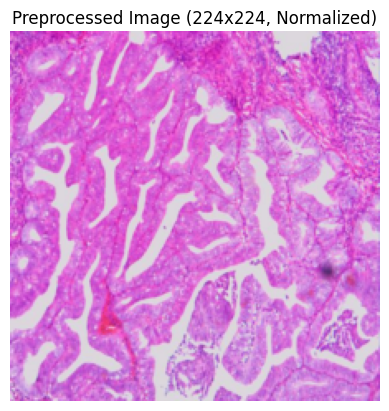

In [1]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load the image (replace 'path_to_your_image' with your actual file path)
image = Image.open(r"D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data\train\EA\1509806.JPG")
# Define the preprocessing steps
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),          # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Apply the preprocessing
image_tensor = preprocess(image)

# Convert tensor back to PIL image after unnormalizing for viewing
unnormalize = transforms.Normalize(
    mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
    std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
)

image_display = transforms.ToPILImage()(unnormalize(image_tensor).clamp(0, 1))

# Display the processed image
plt.imshow(image_display)
plt.title("Preprocessed Image (224x224, Normalized)")
plt.axis("off")
plt.show()

# RegNet

Epoch 0/99
----------


100%|██████████| 72/72 [09:15<00:00,  7.72s/it]


train Loss: 1.3024 Acc: 0.4826


100%|██████████| 16/16 [00:38<00:00,  2.40s/it]


val Loss: 1.0979 Acc: 0.5935
Epoch 1/99
----------


100%|██████████| 72/72 [09:15<00:00,  7.72s/it]


train Loss: 1.0989 Acc: 0.5867


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 1.7079 Acc: 0.5346
Epoch 2/99
----------


100%|██████████| 72/72 [09:16<00:00,  7.73s/it]


train Loss: 1.0171 Acc: 0.6068


100%|██████████| 16/16 [00:36<00:00,  2.28s/it]


val Loss: 1.2635 Acc: 0.6199
Epoch 3/99
----------


100%|██████████| 72/72 [09:15<00:00,  7.71s/it]


train Loss: 0.9951 Acc: 0.6186


100%|██████████| 16/16 [00:36<00:00,  2.27s/it]


val Loss: 0.8692 Acc: 0.6545
Epoch 4/99
----------


100%|██████████| 72/72 [09:15<00:00,  7.72s/it]


train Loss: 0.9735 Acc: 0.6203


100%|██████████| 16/16 [00:36<00:00,  2.28s/it]


val Loss: 0.9288 Acc: 0.6504
Epoch 5/99
----------


100%|██████████| 72/72 [09:15<00:00,  7.71s/it]


train Loss: 0.8847 Acc: 0.6578


100%|██████████| 16/16 [00:36<00:00,  2.27s/it]


val Loss: 0.8088 Acc: 0.6504
Epoch 6/99
----------


100%|██████████| 72/72 [09:16<00:00,  7.73s/it]


train Loss: 0.8448 Acc: 0.6661


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.8873 Acc: 0.6606
Epoch 7/99
----------


100%|██████████| 72/72 [09:05<00:00,  7.58s/it]


train Loss: 0.8197 Acc: 0.6783


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.8529 Acc: 0.7114
Epoch 8/99
----------


100%|██████████| 72/72 [09:06<00:00,  7.59s/it]


train Loss: 0.8250 Acc: 0.6918


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.9604 Acc: 0.6626
Epoch 9/99
----------


100%|██████████| 72/72 [09:06<00:00,  7.58s/it]


train Loss: 0.7987 Acc: 0.6953


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.7715 Acc: 0.6992
Epoch 10/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.61s/it]


train Loss: 0.7902 Acc: 0.7014


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.7984 Acc: 0.7114
Epoch 11/99
----------


100%|██████████| 72/72 [09:07<00:00,  7.60s/it]


train Loss: 0.7512 Acc: 0.7097


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.7288 Acc: 0.7114
Epoch 12/99
----------


100%|██████████| 72/72 [09:07<00:00,  7.61s/it]


train Loss: 0.7389 Acc: 0.7075


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.8163 Acc: 0.6890
Epoch 13/99
----------


100%|██████████| 72/72 [09:09<00:00,  7.63s/it]


train Loss: 0.7273 Acc: 0.7075


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.7275 Acc: 0.7256
Epoch 14/99
----------


100%|██████████| 72/72 [09:05<00:00,  7.58s/it]


train Loss: 0.6918 Acc: 0.7280


100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


val Loss: 0.9117 Acc: 0.7053
Epoch 15/99
----------


100%|██████████| 72/72 [09:07<00:00,  7.60s/it]


train Loss: 0.7055 Acc: 0.7289


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.7741 Acc: 0.7276
Epoch 16/99
----------


100%|██████████| 72/72 [09:11<00:00,  7.65s/it]


train Loss: 0.6785 Acc: 0.7402


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.6622 Acc: 0.7541
Epoch 17/99
----------


100%|██████████| 72/72 [09:07<00:00,  7.61s/it]


train Loss: 0.6558 Acc: 0.7572


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.6265 Acc: 0.7561
Epoch 18/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.6594 Acc: 0.7533


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.6104 Acc: 0.7561
Epoch 19/99
----------


100%|██████████| 72/72 [09:13<00:00,  7.68s/it]


train Loss: 0.6372 Acc: 0.7559


100%|██████████| 16/16 [00:36<00:00,  2.27s/it]


val Loss: 0.6858 Acc: 0.7459
Epoch 20/99
----------


100%|██████████| 72/72 [09:15<00:00,  7.71s/it]


train Loss: 0.6166 Acc: 0.7524


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.7426 Acc: 0.7419
Epoch 21/99
----------


100%|██████████| 72/72 [09:14<00:00,  7.70s/it]


train Loss: 0.6161 Acc: 0.7716


100%|██████████| 16/16 [00:36<00:00,  2.27s/it]


val Loss: 0.6982 Acc: 0.7317
Epoch 22/99
----------


100%|██████████| 72/72 [09:13<00:00,  7.69s/it]


train Loss: 0.6029 Acc: 0.7642


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.7116 Acc: 0.7622
Epoch 23/99
----------


100%|██████████| 72/72 [09:07<00:00,  7.60s/it]


train Loss: 0.5596 Acc: 0.7759


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.6051 Acc: 0.7541
Epoch 24/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.65s/it]


train Loss: 0.5585 Acc: 0.7694


100%|██████████| 16/16 [00:37<00:00,  2.34s/it]


val Loss: 0.6086 Acc: 0.7744
Epoch 25/99
----------


100%|██████████| 72/72 [09:12<00:00,  7.67s/it]


train Loss: 0.5382 Acc: 0.7899


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.8107 Acc: 0.7276
Epoch 26/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.5508 Acc: 0.7899


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.9842 Acc: 0.7398
Epoch 27/99
----------


100%|██████████| 72/72 [09:09<00:00,  7.63s/it]


train Loss: 0.5166 Acc: 0.7912


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.5587 Acc: 0.8028
Epoch 28/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.65s/it]


train Loss: 0.5187 Acc: 0.7982


100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


val Loss: 0.5643 Acc: 0.7927
Epoch 29/99
----------


100%|██████████| 72/72 [09:11<00:00,  7.65s/it]


train Loss: 0.5234 Acc: 0.7969


100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


val Loss: 0.5732 Acc: 0.7947
Epoch 30/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.65s/it]


train Loss: 0.5022 Acc: 0.8060


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.6863 Acc: 0.7927
Epoch 31/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.64s/it]


train Loss: 0.5196 Acc: 0.8099


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.5735 Acc: 0.8110
Epoch 32/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.64s/it]


train Loss: 0.4637 Acc: 0.8230


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.5878 Acc: 0.8150
Epoch 33/99
----------


100%|██████████| 72/72 [09:09<00:00,  7.63s/it]


train Loss: 0.4742 Acc: 0.8195


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.6705 Acc: 0.7785
Epoch 34/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.4380 Acc: 0.8374


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.5647 Acc: 0.8150
Epoch 35/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.4383 Acc: 0.8296


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.5637 Acc: 0.7927
Epoch 36/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.61s/it]


train Loss: 0.4530 Acc: 0.8330


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.5354 Acc: 0.8089
Epoch 37/99
----------


100%|██████████| 72/72 [09:09<00:00,  7.63s/it]


train Loss: 0.4045 Acc: 0.8426


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.5716 Acc: 0.8089
Epoch 38/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.4039 Acc: 0.8400


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.6262 Acc: 0.7907
Epoch 39/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.3740 Acc: 0.8544


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.6593 Acc: 0.8049
Epoch 40/99
----------


100%|██████████| 72/72 [09:13<00:00,  7.68s/it]


train Loss: 0.4021 Acc: 0.8479


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.5908 Acc: 0.8191
Epoch 41/99
----------


100%|██████████| 72/72 [09:13<00:00,  7.69s/it]


train Loss: 0.3725 Acc: 0.8601


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.6296 Acc: 0.7927
Epoch 42/99
----------


100%|██████████| 72/72 [09:14<00:00,  7.70s/it]


train Loss: 0.3672 Acc: 0.8553


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.6303 Acc: 0.8150
Epoch 43/99
----------


100%|██████████| 72/72 [09:16<00:00,  7.72s/it]


train Loss: 0.3824 Acc: 0.8588


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.5722 Acc: 0.8374
Epoch 44/99
----------


100%|██████████| 72/72 [09:16<00:00,  7.73s/it]


train Loss: 0.3782 Acc: 0.8627


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.5291 Acc: 0.8394
Epoch 45/99
----------


100%|██████████| 72/72 [09:14<00:00,  7.70s/it]


train Loss: 0.3341 Acc: 0.8692


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.6980 Acc: 0.8089
Epoch 46/99
----------


100%|██████████| 72/72 [09:14<00:00,  7.69s/it]


train Loss: 0.3443 Acc: 0.8640


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.6974 Acc: 0.8130
Epoch 47/99
----------


100%|██████████| 72/72 [09:12<00:00,  7.67s/it]


train Loss: 0.3168 Acc: 0.8819


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.6648 Acc: 0.8252
Epoch 48/99
----------


100%|██████████| 72/72 [09:13<00:00,  7.69s/it]


train Loss: 0.3310 Acc: 0.8736


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.7054 Acc: 0.7947
Epoch 49/99
----------


100%|██████████| 72/72 [09:12<00:00,  7.67s/it]


train Loss: 0.3023 Acc: 0.8840


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.6606 Acc: 0.8313
Epoch 50/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.3135 Acc: 0.8784


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.6781 Acc: 0.8232
Epoch 51/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.61s/it]


train Loss: 0.2856 Acc: 0.8936


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.6879 Acc: 0.8293
Epoch 52/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.2687 Acc: 0.9037


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.5980 Acc: 0.8313
Epoch 53/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.2644 Acc: 0.8923


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.6273 Acc: 0.8293
Epoch 54/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.2791 Acc: 0.8932


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.7460 Acc: 0.8171
Epoch 55/99
----------


100%|██████████| 72/72 [09:09<00:00,  7.63s/it]


train Loss: 0.2614 Acc: 0.9019


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.6991 Acc: 0.8232
Epoch 56/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.61s/it]


train Loss: 0.2218 Acc: 0.9124


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.8662 Acc: 0.8171
Epoch 57/99
----------


100%|██████████| 72/72 [09:07<00:00,  7.61s/it]


train Loss: 0.2249 Acc: 0.9202


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.6807 Acc: 0.8333
Epoch 58/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.2114 Acc: 0.9137


100%|██████████| 16/16 [00:35<00:00,  2.22s/it]


val Loss: 0.7172 Acc: 0.8272
Epoch 59/99
----------


100%|██████████| 72/72 [09:06<00:00,  7.59s/it]


train Loss: 0.2133 Acc: 0.9154


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.7339 Acc: 0.8374
Epoch 60/99
----------


100%|██████████| 72/72 [09:07<00:00,  7.60s/it]


train Loss: 0.2097 Acc: 0.9241


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.6893 Acc: 0.8354
Epoch 61/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.65s/it]


train Loss: 0.2070 Acc: 0.9198


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.7215 Acc: 0.8211
Epoch 62/99
----------


100%|██████████| 72/72 [09:09<00:00,  7.63s/it]


train Loss: 0.2055 Acc: 0.9263


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.7260 Acc: 0.8191
Epoch 63/99
----------


100%|██████████| 72/72 [09:09<00:00,  7.63s/it]


train Loss: 0.1854 Acc: 0.9281


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.7631 Acc: 0.8232
Epoch 64/99
----------


100%|██████████| 72/72 [09:11<00:00,  7.66s/it]


train Loss: 0.2017 Acc: 0.9316


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.7153 Acc: 0.8211
Epoch 65/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.65s/it]


train Loss: 0.1962 Acc: 0.9294


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.8089 Acc: 0.8476
Epoch 66/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.64s/it]


train Loss: 0.1777 Acc: 0.9372


100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


val Loss: 0.8161 Acc: 0.8252
Epoch 67/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.64s/it]


train Loss: 0.1670 Acc: 0.9359


100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


val Loss: 0.8631 Acc: 0.8232
Epoch 68/99
----------


100%|██████████| 72/72 [09:08<00:00,  7.62s/it]


train Loss: 0.1594 Acc: 0.9425


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.7729 Acc: 0.8476
Epoch 69/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.64s/it]


train Loss: 0.1694 Acc: 0.9407


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.8111 Acc: 0.8313
Epoch 70/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.64s/it]


train Loss: 0.1576 Acc: 0.9412


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.7727 Acc: 0.8374
Epoch 71/99
----------


100%|██████████| 72/72 [09:11<00:00,  7.66s/it]


train Loss: 0.1439 Acc: 0.9464


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.8044 Acc: 0.8354
Epoch 72/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.64s/it]


train Loss: 0.1500 Acc: 0.9468


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.7665 Acc: 0.8394
Epoch 73/99
----------


100%|██████████| 72/72 [09:11<00:00,  7.67s/it]


train Loss: 0.1534 Acc: 0.9499


100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


val Loss: 0.8093 Acc: 0.8455
Epoch 74/99
----------


100%|██████████| 72/72 [09:12<00:00,  7.67s/it]


train Loss: 0.1617 Acc: 0.9398


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.8072 Acc: 0.8415
Epoch 75/99
----------


100%|██████████| 72/72 [09:16<00:00,  7.72s/it]


train Loss: 0.1311 Acc: 0.9529


100%|██████████| 16/16 [00:37<00:00,  2.34s/it]


val Loss: 0.8463 Acc: 0.8293
Epoch 76/99
----------


100%|██████████| 72/72 [09:12<00:00,  7.67s/it]


train Loss: 0.1253 Acc: 0.9542


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.8606 Acc: 0.8313
Epoch 77/99
----------


100%|██████████| 72/72 [09:13<00:00,  7.68s/it]


train Loss: 0.1333 Acc: 0.9494


100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


val Loss: 0.7987 Acc: 0.8516
Epoch 78/99
----------


100%|██████████| 72/72 [09:12<00:00,  7.67s/it]


train Loss: 0.1345 Acc: 0.9516


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.8510 Acc: 0.8476
Epoch 79/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.65s/it]


train Loss: 0.1079 Acc: 0.9599


100%|██████████| 16/16 [00:35<00:00,  2.22s/it]


val Loss: 0.8779 Acc: 0.8313
Epoch 80/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.65s/it]


train Loss: 0.1233 Acc: 0.9542


100%|██████████| 16/16 [00:35<00:00,  2.22s/it]


val Loss: 0.8584 Acc: 0.8394
Epoch 81/99
----------


100%|██████████| 72/72 [09:11<00:00,  7.66s/it]


train Loss: 0.1117 Acc: 0.9603


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.8884 Acc: 0.8394
Epoch 82/99
----------


100%|██████████| 72/72 [09:09<00:00,  7.63s/it]


train Loss: 0.1026 Acc: 0.9608


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.8430 Acc: 0.8435
Epoch 83/99
----------


100%|██████████| 72/72 [09:09<00:00,  7.63s/it]


train Loss: 0.1048 Acc: 0.9573


100%|██████████| 16/16 [00:36<00:00,  2.26s/it]


val Loss: 0.8531 Acc: 0.8455
Epoch 84/99
----------


100%|██████████| 72/72 [09:11<00:00,  7.66s/it]


train Loss: 0.1100 Acc: 0.9555


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.9013 Acc: 0.8415
Epoch 85/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.65s/it]


train Loss: 0.1056 Acc: 0.9595


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.8913 Acc: 0.8455
Epoch 86/99
----------


100%|██████████| 72/72 [09:09<00:00,  7.63s/it]


train Loss: 0.1084 Acc: 0.9582


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.8933 Acc: 0.8415
Epoch 87/99
----------


100%|██████████| 72/72 [09:12<00:00,  7.67s/it]


train Loss: 0.0997 Acc: 0.9638


100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


val Loss: 0.8525 Acc: 0.8455
Epoch 88/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.65s/it]


train Loss: 0.1062 Acc: 0.9582


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.8470 Acc: 0.8537
Epoch 89/99
----------


100%|██████████| 72/72 [09:11<00:00,  7.65s/it]


train Loss: 0.0898 Acc: 0.9660


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.8330 Acc: 0.8455
Epoch 90/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.65s/it]


train Loss: 0.1069 Acc: 0.9603


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.8712 Acc: 0.8435
Epoch 91/99
----------


100%|██████████| 72/72 [09:13<00:00,  7.68s/it]


train Loss: 0.1135 Acc: 0.9582


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.8540 Acc: 0.8435
Epoch 92/99
----------


100%|██████████| 72/72 [09:12<00:00,  7.67s/it]


train Loss: 0.0945 Acc: 0.9660


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.8971 Acc: 0.8415
Epoch 93/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.64s/it]


train Loss: 0.1048 Acc: 0.9625


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.9102 Acc: 0.8415
Epoch 94/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.64s/it]


train Loss: 0.0942 Acc: 0.9651


100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


val Loss: 0.8839 Acc: 0.8455
Epoch 95/99
----------


100%|██████████| 72/72 [09:12<00:00,  7.67s/it]


train Loss: 0.0864 Acc: 0.9660


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


val Loss: 0.9020 Acc: 0.8455
Epoch 96/99
----------


100%|██████████| 72/72 [09:12<00:00,  7.67s/it]


train Loss: 0.0977 Acc: 0.9629


100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


val Loss: 0.8845 Acc: 0.8394
Epoch 97/99
----------


100%|██████████| 72/72 [09:11<00:00,  7.66s/it]


train Loss: 0.0853 Acc: 0.9669


100%|██████████| 16/16 [00:35<00:00,  2.25s/it]


val Loss: 0.8787 Acc: 0.8455
Epoch 98/99
----------


100%|██████████| 72/72 [09:11<00:00,  7.67s/it]


train Loss: 0.0975 Acc: 0.9625


100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


val Loss: 0.8680 Acc: 0.8455
Epoch 99/99
----------


100%|██████████| 72/72 [09:10<00:00,  7.64s/it]


train Loss: 0.0818 Acc: 0.9677


100%|██████████| 16/16 [00:36<00:00,  2.25s/it]


val Loss: 0.8807 Acc: 0.8455
Best val Acc: 0.8537
Model and training state saved at: regnet_y_8gf_20241128_000540.pth

Evaluating the model...


100%|██████████| 16/16 [00:36<00:00,  2.29s/it]



Classification Report:
               precision    recall  f1-score   support

           EA       0.89      0.94      0.91        80
   EH_Complex       0.87      0.79      0.83        43
    EH_Simple       0.87      0.87      0.87        78
           EP       0.72      0.79      0.76        96
NE_Follicular       0.82      0.79      0.80       107
    NE_Luteal       0.94      0.89      0.92        91

     accuracy                           0.84       495
    macro avg       0.85      0.84      0.85       495
 weighted avg       0.85      0.84      0.85       495


Confusion Matrix:


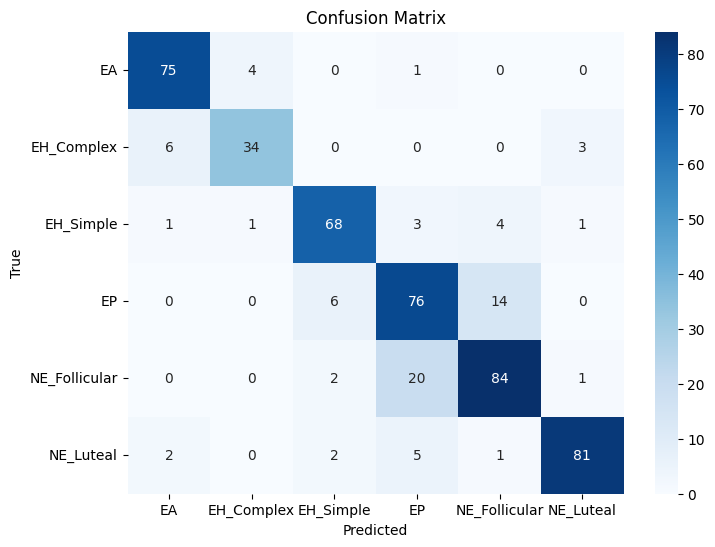

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.models import regnet_y_8gf, RegNet_Y_8GF_Weights
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm import tqdm
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}


# Define a Custom RegNet_Y_8GF Model
class CustomRegNet(nn.Module):
    def __init__(self, num_classes=7):
        super(CustomRegNet, self).__init__()
        # Load RegNet_Y_8GF with pre-trained weights
        self.regnet = regnet_y_8gf(weights=RegNet_Y_8GF_Weights.IMAGENET1K_V2)
        
        # Modify the final fully connected layer
        num_ftrs = self.regnet.fc.in_features
        self.regnet.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_ftrs, num_classes)
        )
    
    def forward(self, x):
        return self.regnet(x)


# Training class
class ModelTrainer:
    def __init__(self, model, dataloaders, dataset_sizes, criterion, optimizer, scheduler):
        self.model = model
        self.dataloaders = dataloaders
        self.dataset_sizes = dataset_sizes
        self.criterion = criterion
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    def train(self, num_epochs=30, resume=False, checkpoint_path=None):
        best_model_wts = self.model.state_dict()
        best_acc = 0.0
        
        # Resume from checkpoint
        if resume and checkpoint_path:
            checkpoint = torch.load(checkpoint_path)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            self.history = checkpoint['history']
            print(f"Resumed training from checkpoint at: {checkpoint_path}")
        
        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)
            
            for phase in ['train', 'val']:
                if phase == 'train':
                    self.model.train()
                else:
                    self.model.eval()
                
                running_loss = 0.0
                running_corrects = 0
                
                for inputs, labels in tqdm(self.dataloaders[phase]):
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    
                    self.optimizer.zero_grad()
                    
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = self.model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = self.criterion(outputs, labels)
                        
                        if phase == 'train':
                            loss.backward()
                            # Gradient clipping
                            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                            self.optimizer.step()
                
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                
                epoch_loss = running_loss / self.dataset_sizes[phase]
                epoch_acc = running_corrects.double() / self.dataset_sizes[phase]
                
                # Store history
                self.history[f'{phase}_loss'].append(epoch_loss)
                self.history[f'{phase}_acc'].append(epoch_acc.item())
                
                if phase == 'train':
                    self.scheduler.step()
                
                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
                
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = self.model.state_dict()
        
        print(f'Best val Acc: {best_acc:.4f}')
        self.model.load_state_dict(best_model_wts)
        return self.model, self.history

# Evaluate the model with classification report and confusion matrix
def evaluate_model(model, test_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Classification Report
    print("\nClassification Report:")
    report = classification_report(all_labels, all_preds, target_names=class_names)
    print(report)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    print("\nConfusion Matrix:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    
    return report, conf_matrix


def load_checkpoint(checkpoint_path, model, optimizer=None):
    """Load model and optimizer state from checkpoint."""
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    if optimizer:
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    print(f"Loaded model from checkpoint: {checkpoint_path}")
    return model




if __name__ == '__main__':
    # Configuration
    config = {
        'model_name': 'regnety_8gf',
        'batch_size': 32,
        'learning_rate': 0.001,
        'num_epochs': 100,
        'num_classes': 6
    }
    
    # Set your data directory
    data_dir = 'D:/Engineering/SEM7/COMPUTER VISION/proj_imp/DATASET/org_datahistopath_img_data'
    
    # Load datasets
    image_datasets = {x: ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                     for x in ['train', 'val', 'test']}
    dataloaders = {x: DataLoader(image_datasets[x], batch_size=config['batch_size'],
                                shuffle=True if x == 'train' else False, num_workers=4, pin_memory=True)
                  for x in ['train', 'val', 'test']}
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
    class_names = image_datasets['train'].classes
    
    # Create model
    model = CustomRegNet(num_classes=config['num_classes'])
    model = model.to(device)
    
    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=config['learning_rate'])
    scheduler = CosineAnnealingLR(optimizer, T_max=config['num_epochs'])
    
    # Train the model (Fresh training or Resume training)
    trainer = ModelTrainer(model, dataloaders, dataset_sizes, criterion, optimizer, scheduler)
    
    # Resume Training if checkpoint exists
    resume_training = False
    checkpoint_path = r"D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\regnet_y_8gf_20241126_230711.pth"
    
    if resume_training and os.path.exists(checkpoint_path):
        model, history = trainer.train(num_epochs=100, resume=True, checkpoint_path=checkpoint_path)
    else:
        model, history = trainer.train(num_epochs=config['num_epochs'])
    
    # Save the model and training state
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    save_path = f"regnet_y_8gf_{timestamp}.pth"
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'history': trainer.history
    }, save_path)
    print(f"Model and training state saved at: {save_path}")
    
    # Evaluate the model
    print("\nEvaluating the model...")
    evaluate_model(model, dataloaders['test'], class_names)


# EfficientNet-b3

In [32]:
import torch
import torch.nn as nn
import timm
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset path (update this with your actual dataset path)
data_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data'  # Replace with your dataset path
batch_size = 32
img_size = 224  # Standard size for EfficientNet

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
train_data = datasets.ImageFolder(root=os.path.join(data_dir, 'train'), transform=transform)
val_data = datasets.ImageFolder(root=os.path.join(data_dir, 'val'), transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4)

# Load pre-trained EfficientNet model and modify for our dataset
model = timm.create_model('efficientnet_b3', pretrained=False)  # Using EfficientNet-B3 as an example
model.classifier = nn.Linear(model.classifier.in_features, len(train_data.classes))  # Adjust to number of classes
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc = 100 * correct / total
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%\n")

# Run training
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100)

# Save the trained model
torch.save(model.state_dict(), 'efficientnet_model.pth')


Using device: cuda
Epoch [1/100], Loss: 1.7736, Accuracy: 24.98%
Validation Loss: 1.9308, Validation Accuracy: 26.63%

Epoch [2/100], Loss: 1.7156, Accuracy: 28.64%
Validation Loss: 2.7065, Validation Accuracy: 27.85%

Epoch [3/100], Loss: 1.6867, Accuracy: 29.47%
Validation Loss: 1.9943, Validation Accuracy: 29.27%

Epoch [4/100], Loss: 1.6114, Accuracy: 32.74%
Validation Loss: 1.9811, Validation Accuracy: 31.50%

Epoch [5/100], Loss: 1.5337, Accuracy: 38.97%
Validation Loss: 2.5129, Validation Accuracy: 34.15%

Epoch [6/100], Loss: 1.4146, Accuracy: 43.81%
Validation Loss: 1.8130, Validation Accuracy: 32.32%

Epoch [7/100], Loss: 1.2212, Accuracy: 52.40%
Validation Loss: 1.9685, Validation Accuracy: 35.16%

Epoch [8/100], Loss: 0.9916, Accuracy: 63.08%
Validation Loss: 2.5027, Validation Accuracy: 36.59%

Epoch [9/100], Loss: 0.8212, Accuracy: 69.66%
Validation Loss: 2.7155, Validation Accuracy: 35.37%

Epoch [10/100], Loss: 0.6350, Accuracy: 75.94%
Validation Loss: 2.5007, Validatio

C:\Users\user\AppData\Local\Temp\ipykernel_2876\859376039.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


Precision: 0.39
Recall: 0.38
F1 Score: 0.38

Classification Report:

               precision    recall  f1-score   support

           EA       0.35      0.56      0.43        80
   EH_Complex       0.55      0.40      0.47        42
    EH_Simple       0.41      0.38      0.39        78
           EP       0.32      0.29      0.31        95
NE_Follicular       0.40      0.38      0.39       107
    NE_Luteal       0.37      0.29      0.33        90

     accuracy                           0.38       492
    macro avg       0.40      0.39      0.39       492
 weighted avg       0.39      0.38      0.38       492



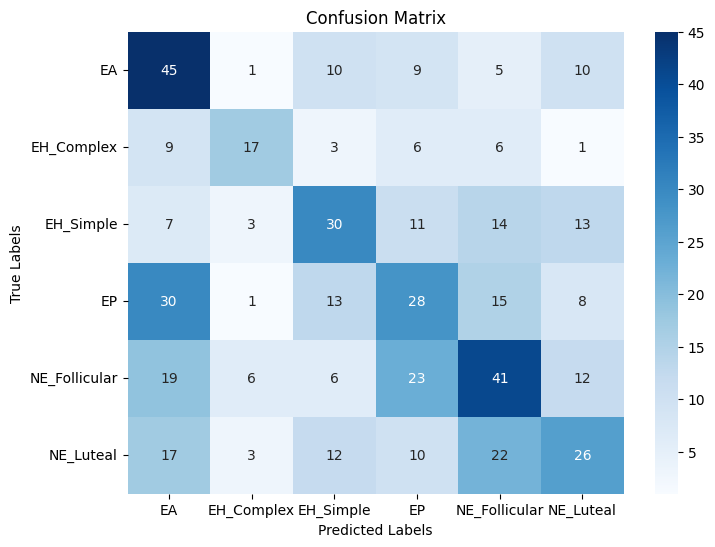

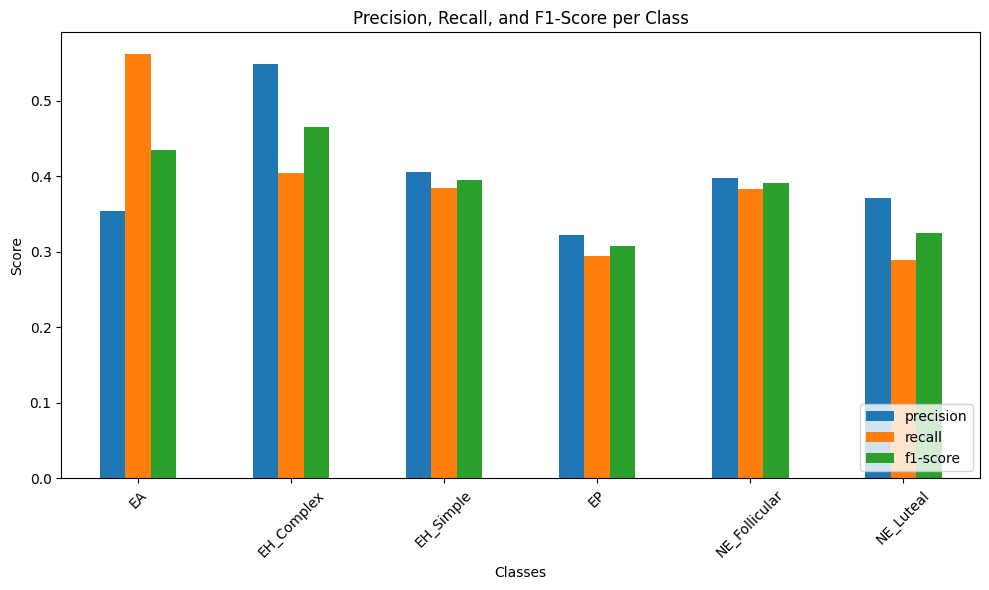

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def load_model(path, num_classes):
    # Initialize the model structure
    model = timm.create_model('efficientnet_b3', pretrained=False)
    model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    
    # Load the saved model weights
    model.load_state_dict(torch.load(path))
    model = model.to(device)
    model.eval()
    return model

def evaluate_model_with_report(model, dataloader, class_names):
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            # Collect the labels and predictions
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    
    # Calculate metrics
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Generate classification report
    report = classification_report(all_labels, all_preds, target_names=class_names, digits=2)
    print("\nClassification Report:\n")
    print(report)
    
    # Convert classification report to a DataFrame for visualization
    report_dict = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True)
    metrics_df = pd.DataFrame(report_dict).transpose()
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Plot precision, recall, and F1-score for each class
    metrics_df = metrics_df[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg' for per-class metrics
    metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
    plt.title("Precision, Recall, and F1-Score per Class")
    plt.xlabel("Classes")
    plt.ylabel("Score")
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

# Load the saved model
model = load_model(r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\efficientnet_model.pth', num_classes=len(train_data.classes))

# Evaluate the model and generate the classification report
evaluate_model_with_report(model, val_loader, train_data.classes)


# EfficientNet-b1

In [34]:
import torch
import torch.nn as nn
import timm
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset path (update this with your actual dataset path)
data_dir = r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\org_datahistopath_img_data'  # Replace with your dataset path
batch_size = 32
img_size = 224  # Standard size for EfficientNet

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
train_data = datasets.ImageFolder(root=os.path.join(data_dir, 'train'), transform=transform)
val_data = datasets.ImageFolder(root=os.path.join(data_dir, 'val'), transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4)

# Load pre-trained EfficientNet model and modify for our dataset
model = timm.create_model('efficientnet_b1', pretrained=True)  # Using EfficientNet-B3 as an example
model.classifier = nn.Linear(model.classifier.in_features, len(train_data.classes))  # Adjust to number of classes
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc = 100 * correct / total
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%\n")

# Run training
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100)

# Save the trained model
torch.save(model.state_dict(), 'efficientnetb1_model.pth')


Using device: cuda
Epoch [1/100], Loss: 1.1450, Accuracy: 56.63%
Validation Loss: 0.7964, Validation Accuracy: 69.51%

Epoch [2/100], Loss: 0.5852, Accuracy: 78.68%
Validation Loss: 0.6573, Validation Accuracy: 77.85%

Epoch [3/100], Loss: 0.3374, Accuracy: 88.23%
Validation Loss: 0.6682, Validation Accuracy: 74.59%

Epoch [4/100], Loss: 0.1840, Accuracy: 94.03%
Validation Loss: 0.7564, Validation Accuracy: 74.39%

Epoch [5/100], Loss: 0.1445, Accuracy: 95.47%
Validation Loss: 0.8060, Validation Accuracy: 75.81%

Epoch [6/100], Loss: 0.1114, Accuracy: 96.29%
Validation Loss: 0.7051, Validation Accuracy: 78.86%

Epoch [7/100], Loss: 0.0692, Accuracy: 97.91%
Validation Loss: 0.8624, Validation Accuracy: 76.22%

Epoch [8/100], Loss: 0.0806, Accuracy: 97.38%
Validation Loss: 0.8755, Validation Accuracy: 76.22%

Epoch [9/100], Loss: 0.1016, Accuracy: 96.69%
Validation Loss: 0.9428, Validation Accuracy: 75.41%

Epoch [10/100], Loss: 0.0899, Accuracy: 96.95%
Validation Loss: 0.8929, Validatio

C:\Users\user\AppData\Local\Temp\ipykernel_2876\1727709341.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


Precision: 0.78
Recall: 0.78
F1 Score: 0.78

Classification Report:

               precision    recall  f1-score   support

           EA       0.81      0.88      0.84        80
   EH_Complex       0.71      0.69      0.70        42
    EH_Simple       0.83      0.74      0.78        78
           EP       0.66      0.71      0.68        95
NE_Follicular       0.76      0.75      0.75       107
    NE_Luteal       0.88      0.87      0.87        90

     accuracy                           0.78       492
    macro avg       0.78      0.77      0.77       492
 weighted avg       0.78      0.78      0.78       492



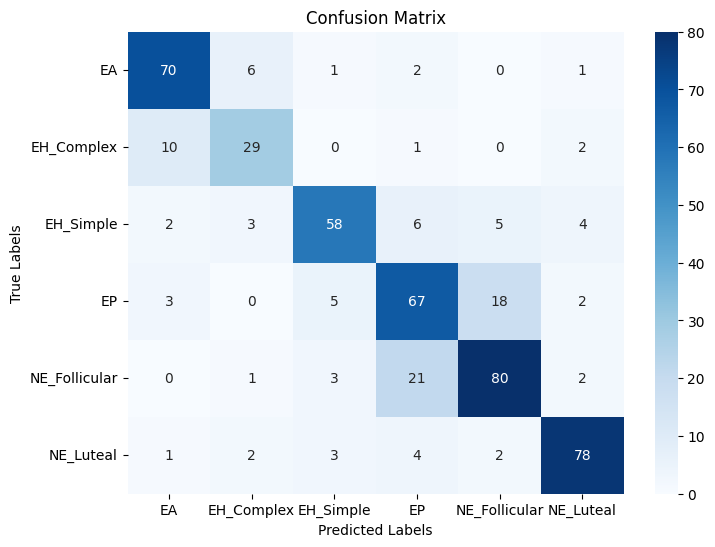

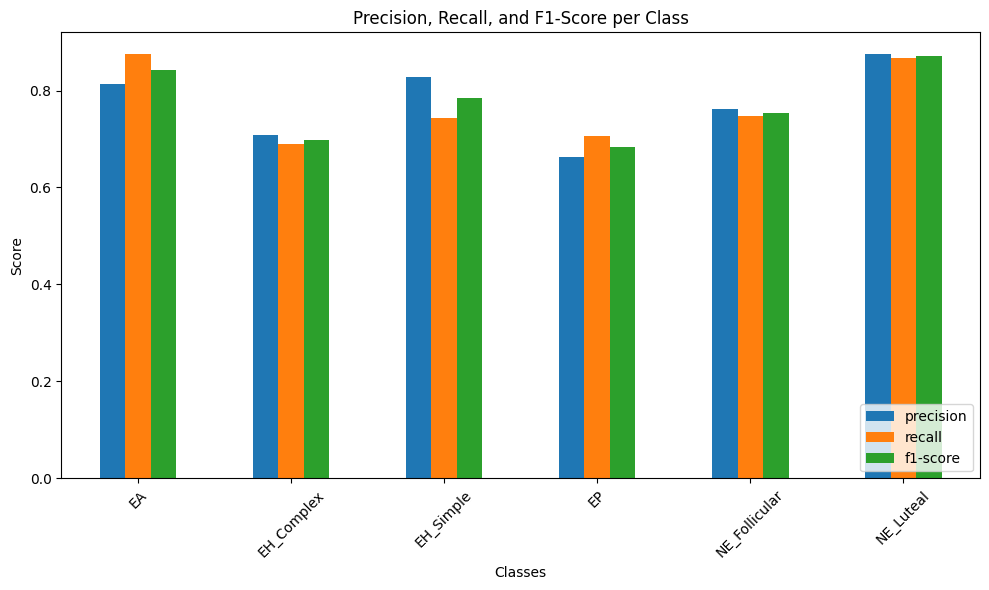

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def load_model(path, num_classes):
    # Initialize the model structure
    model = timm.create_model('efficientnet_b1', pretrained=False)
    model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    
    # Load the saved model weights
    model.load_state_dict(torch.load(path))
    model = model.to(device)
    model.eval()
    return model

def evaluate_model_with_report(model, dataloader, class_names):
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            # Collect the labels and predictions
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    
    # Calculate metrics
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Generate classification report
    report = classification_report(all_labels, all_preds, target_names=class_names, digits=2)
    print("\nClassification Report:\n")
    print(report)
    
    # Convert classification report to a DataFrame for visualization
    report_dict = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True)
    metrics_df = pd.DataFrame(report_dict).transpose()
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Plot precision, recall, and F1-score for each class
    metrics_df = metrics_df[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg' for per-class metrics
    metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
    plt.title("Precision, Recall, and F1-Score per Class")
    plt.xlabel("Classes")
    plt.ylabel("Score")
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

# Load the saved model
model = load_model(r'D:\Engineering\SEM7\COMPUTER VISION\proj_imp\DATASET\efficientnetb1_model.pth', num_classes=len(train_data.classes))

# Evaluate the model and generate the classification report
evaluate_model_with_report(model, val_loader, train_data.classes)